In [1]:
import os
import pandas as pd

In [2]:
csv_path = '../content/sample_data'
cleandf = pd.read_csv(os.path.join(csv_path, 'clean_data.csv'))

In [3]:
cleandf

,Unnamed: 0,text,target
0,0,smell hillary fear daniel greenfield shillman ...,0
1,1,watch exact moment paul ryan commit political ...,0
2,2,kerry go paris gesture sympathy u secretary st...,1
3,3,bernie supporter twitter erupt anger dnc try w...,0
4,4,battle new york primary matter primary day new...,1
...,...,...,...
6330,6330,state department say can find email clinton sp...,1
6331,6331,p pb stand plutocratic pentagon p pb stand plu...,0
6332,6332,anti trump protester tool oligarchy informatio...,0
6333,6333,ethiopia obama seek progress peace security ea...,1


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.layers import Dense, Conv1D, Embedding, Flatten, Masking, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
es = EarlyStopping(monitor='val_binary_accuracy', patience=10, restore_best_weights=True)

In [7]:
def initialize_model ():
    model = Sequential()
    model.add(Embedding(
        input_dim=(len(tokenizer.word_index))+1, # +1 for the 0 padding
        input_length=300, # Max_sentence_length (optional, for model summary)
        output_dim=100,
        mask_zero=True, # Built-in masking layer :)
    ))
    #model.add(GRU(20, return_sequences=True))
    model.add(Conv1D(30, kernel_size=5, activation='tanh'))
    model.add(Flatten())
    model.add(Dense(15, activation='relu'))
    #model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [8]:
binacc = BinaryAccuracy()
prec = Precision()
rec = Recall()

In [9]:
def compile_model(model):
    
    model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001), 
              metrics=[binacc, prec, rec]) 
    
    return model

In [10]:
def plot_loss_accuracy(history, title):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))
    
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title(f'{title} Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=2)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['binary_accuracy'])
    ax2.plot(history.history['val_binary_accuracy'])
    ax2.set_title(f'{title} Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=2)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    ax3.plot(history.history['precision'])
    ax3.plot(history.history['val_precision'])
    ax3.set_title(f'{title} Precision')
    ax3.set_ylabel('Precision')
    ax3.set_xlabel('Epoch')
    ax3.set_ylim(ymin=0, ymax=2)
    ax3.legend(['Train', 'Validation'], loc='best')
    ax3.grid(axis="x",linewidth=0.5)
    ax3.grid(axis="y",linewidth=0.5)    
    
    ax4.plot(history.history['recall'])
    ax4.plot(history.history['val_recall'])
    ax4.set_title(f'{title} Recall')
    ax4.set_ylabel('Recall')
    ax4.set_xlabel('Epoch')
    ax4.set_ylim(ymin=0, ymax=2)
    ax4.legend(['Train', 'Validation'], loc='best')
    ax4.grid(axis="x",linewidth=0.5)
    ax4.grid(axis="y",linewidth=0.5)  
    
    plt.show()

In [11]:
sizes = [0.3, 0.25, 0.2]

60/60 [==============================] - 0s 4ms/step - loss: 0.3088 - binary_accuracy: 0.9153 - precision: 0.9185 - recall: 0.9137


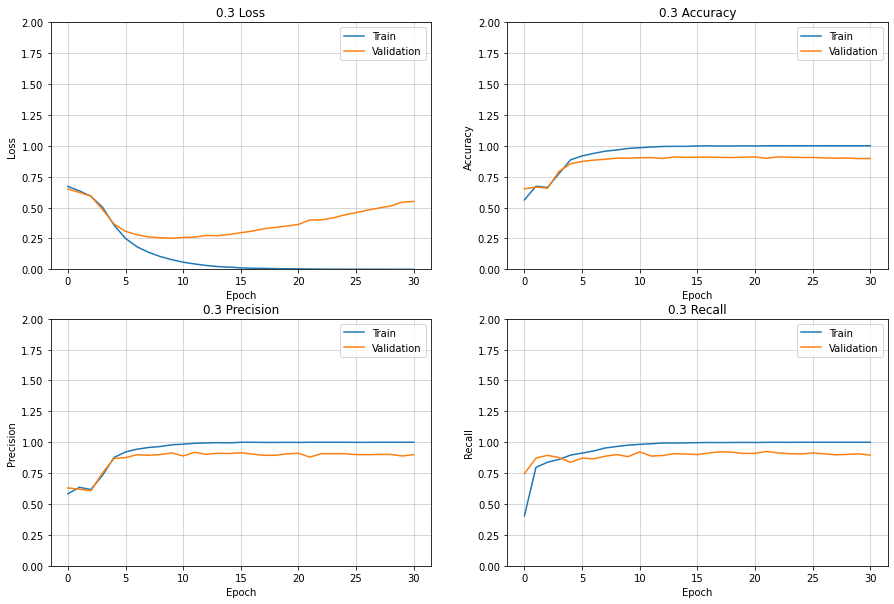

60/60 [==============================] - 0s 4ms/step - loss: 0.2442 - binary_accuracy: 0.9153 - precision: 0.9256 - recall: 0.9054


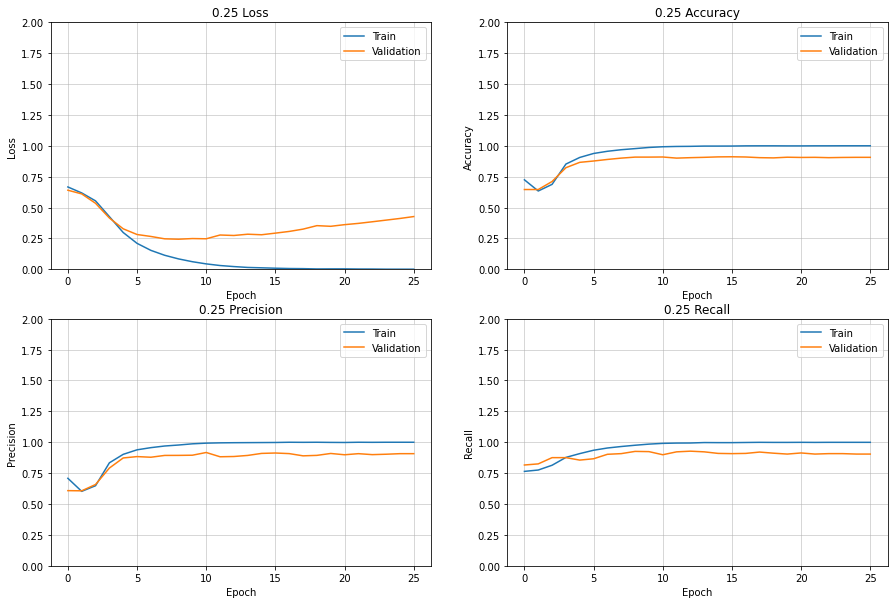

60/60 [==============================] - 0s 4ms/step - loss: 0.2258 - binary_accuracy: 0.9164 - precision: 0.9027 - recall: 0.9356


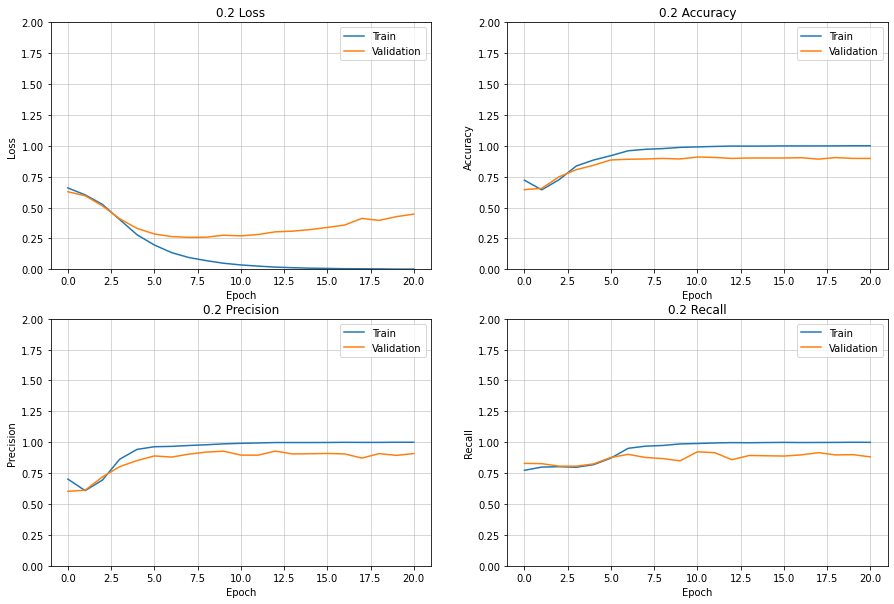

50/50 [==============================] - 0s 4ms/step - loss: 0.2096 - binary_accuracy: 0.9198 - precision: 0.9053 - recall: 0.9402


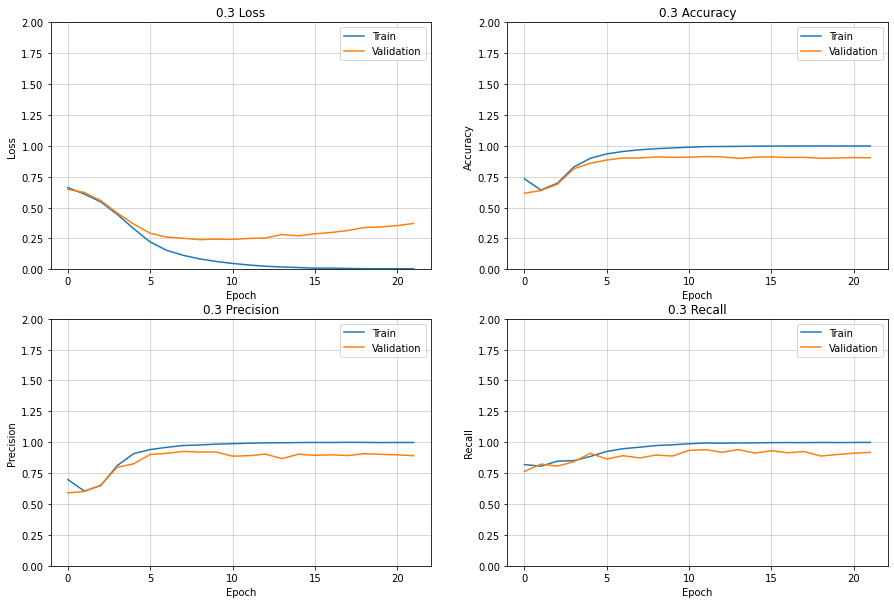

50/50 [==============================] - 0s 4ms/step - loss: 0.2154 - binary_accuracy: 0.9274 - precision: 0.9354 - recall: 0.9203


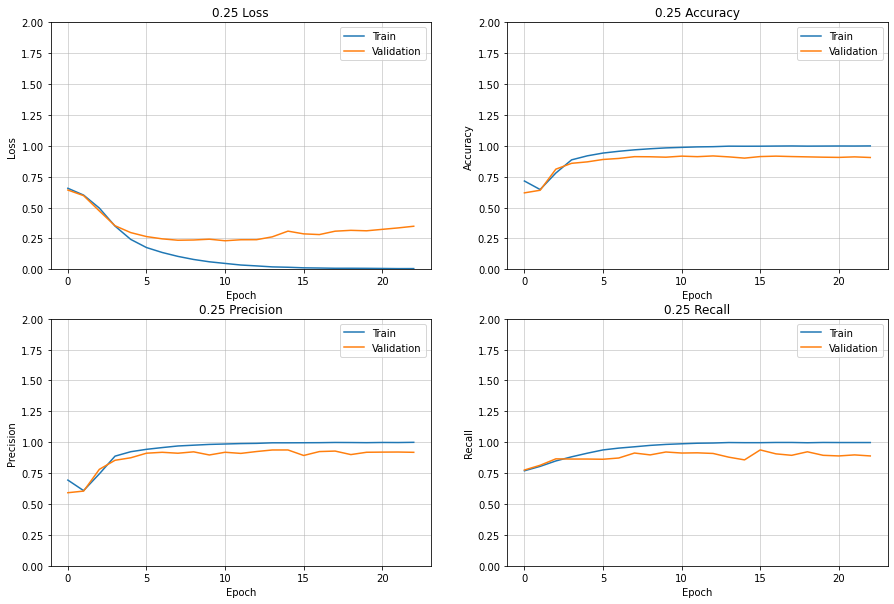

50/50 [==============================] - 0s 4ms/step - loss: 0.2257 - binary_accuracy: 0.9230 - precision: 0.9305 - recall: 0.9166


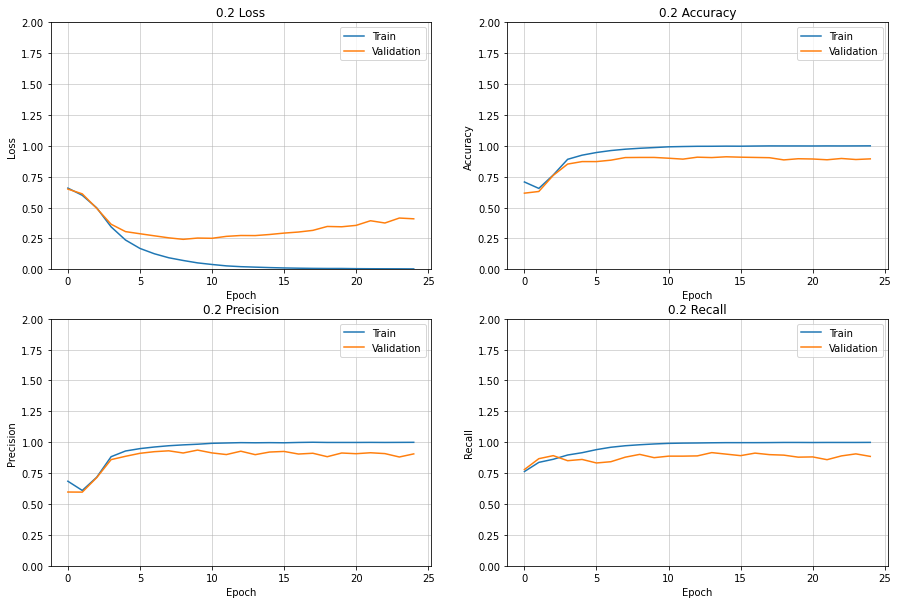

40/40 [==============================] - 0s 4ms/step - loss: 0.2278 - binary_accuracy: 0.9132 - precision: 0.9177 - recall: 0.9120


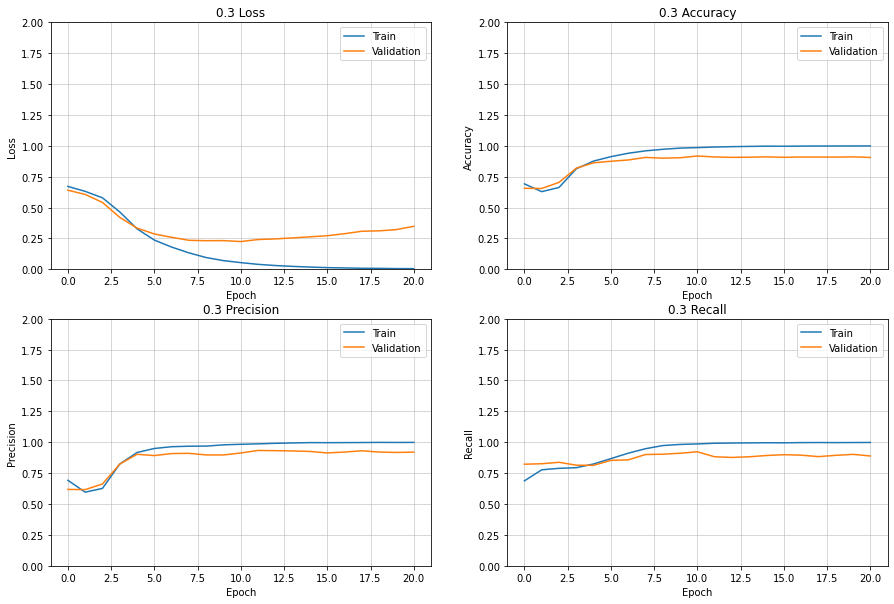

40/40 [==============================] - 0s 4ms/step - loss: 0.2232 - binary_accuracy: 0.9140 - precision: 0.9218 - recall: 0.9090


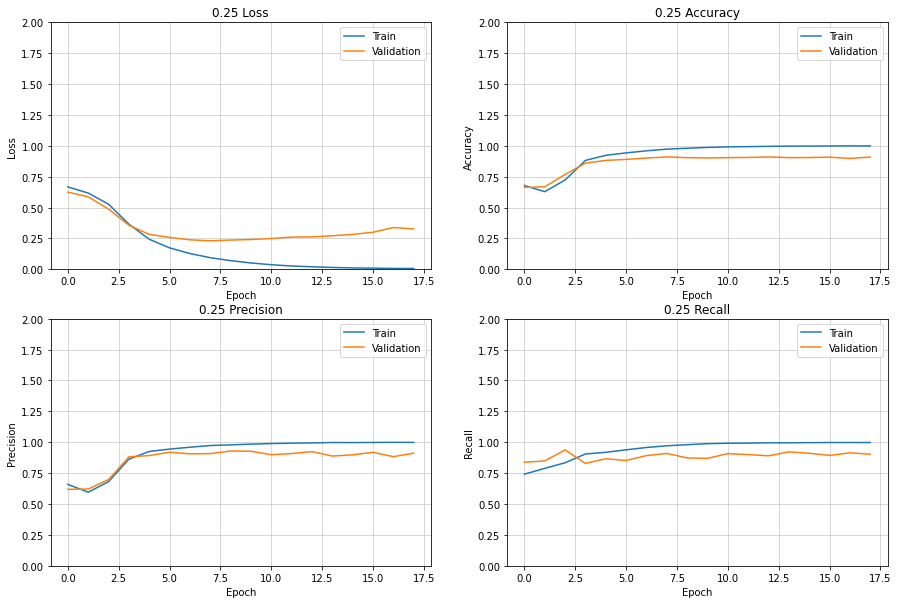

40/40 [==============================] - 0s 4ms/step - loss: 0.2241 - binary_accuracy: 0.9148 - precision: 0.9206 - recall: 0.9120


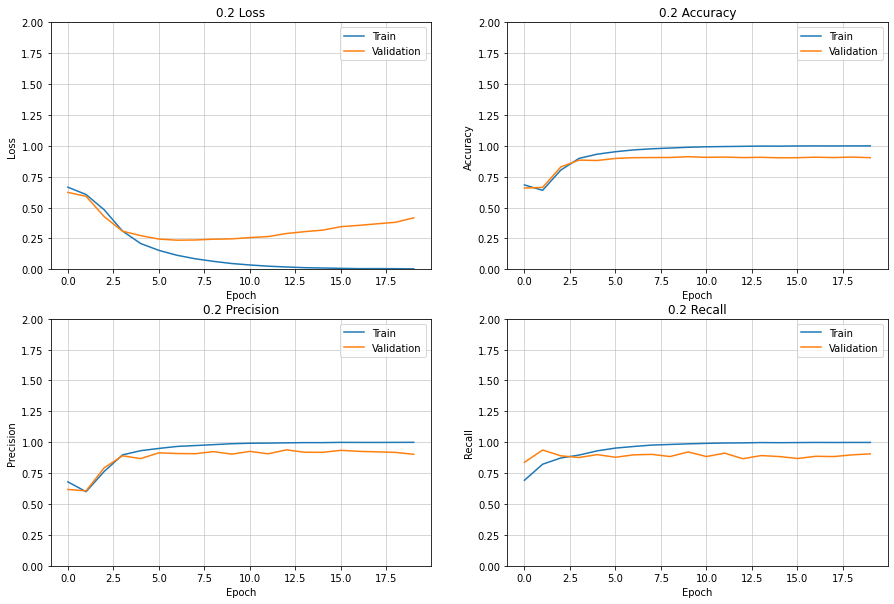

CPU times: user 3min 42s, sys: 21.9 s, total: 4min 4s
Wall time: 3min 41s


In [14]:
%%time
for size in sizes:
    X_train, X_test, y_train, y_test = train_test_split(cleandf['text'], cleandf['target'], test_size=size)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)
    X_train_token = tokenizer.texts_to_sequences(X_train)
    X_test_token = tokenizer.texts_to_sequences(X_test)
    X_train_token = pad_sequences(X_train_token, dtype='int32', padding='post', maxlen=300)
    X_test_token = pad_sequences(X_test_token, dtype='int32', padding='post', maxlen=300)
    
    for size in sizes:
        model = compile_model(initialize_model())
        history = model.fit(X_train_token, y_train, 
              epochs=50, 
              batch_size=32,
              validation_split=size,
              callbacks=[es],
            verbose = 0, 
            use_multiprocessing=True
             )
        model.evaluate(X_test_token, y_test, verbose=1)
        plot_loss_accuracy(history, size)

# Conclusion:
## Best test size for test: 0.25
## Best test size for validation: 0.25